__NAME:__ __FULLNAME__  
__SECTION:__ __NUMBER__  
__CS 5970: Machine Learning Practices__

# Homework 8: Support Vector Machines

## Assignment Overview
Follow the TODOs and read through and understand any provided code.  
Post any questions regarding the assignment, to the Canvas discussion.
For all plots, make sure all necessary axes and curves are clearly and 
accurately labeled. Include figure/plot titles appropriately as well.

### Task
For this assignment you will be exploring support vector machines (SVMs)
using GridsearchCV and working with highly unbalanced datasets.


### [Data set](https://www.kaggle.com/kerneler/starter-credit-card-fraud-detection-e6d0de2d-9)
European Cardholder Credit Card Transactions, September 2013  
This dataset presents transactions that occurred over two days. There were 492 incidents of 
frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class 
(frauds) accounts for 0.197% of all transactions.

__Features__  
* V1, V2, ... V28: are principal components obtained with PCA  
* Time: the seconds elapsed between each transaction and the first transaction  
* Amount: is the transaction Amount  
* Class: the predicted variable; 1 in case of fraud and 0 otherwise.  

Given the class imbalance ratio, it is recommended to use precision, recall and the 
Area Under the Precision-Recall Curve (AUPRC) to evaluate skill. Traditional accuracy 
and AUC are not meaningful for highly unbalanced classification. These scores are 
misleading due to the high impact of the large number of negative cases that can easily
be identified. 

Examining precision and recall is more informative as these disregard the number of 
correctly identified negative cases (i.e. TN) and focus on the number of correctly 
identified positive cases (TP) and mis-identified negative cases (FP). Another useful 
metric is the F1 score which is the harmonic mean of the precision and recall; 1 is the 
best F1 score.

Confusion Matrix  
[TN  FP]  
[FN  TP]

Accuracy = $\frac{TN + TP}{TN + TP + FN + FP}$  
TPR = $\frac{TP}{TP + FN}$  
FPR = $\frac{FP}{FP + TN}$  

Recall = TPR = $\frac{TP}{TP + FN}$  
Precision = $\frac{TP}{TP + FP}$  
F1 Score = 2 * $\frac{precision * recall}{precision + recall}$  

See the references below for more details on precision, recall, and the F1 score.


The dataset was collected and analysed during a research collaboration of 
Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université 
Libre de Bruxelles) on big data mining and fraud detection [1]

[1] Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi.
Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium
on Computational Intelligence and Data Mining (CIDM), IEEE, 2015.
http://mlg.ulb.ac.be/BruFence . http://mlg.ulb.ac.be/ARTML


### Objectives
* Understanding Support Vector Machines
* GridSearch with Classification
* Creating Scoring functions
* Stratification

### Notes
* Do not save work within the ml_practices folder

### General References
* [Guide to Jupyter](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)
* [Python Built-in Functions](https://docs.python.org/3/library/functions.html)
* [Python Data Structures](https://docs.python.org/3/tutorial/datastructures.html)
* [Numpy Reference](https://docs.scipy.org/doc/numpy/reference/index.html)
* [Numpy Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
* [Summary of matplotlib](https://matplotlib.org/3.1.1/api/pyplot_summary.html)
* [DataCamp: Matplotlib](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python?utm_source=adwords_ppc&utm_campaignid=1565261270&utm_adgroupid=67750485268&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=1t1&utm_creative=332661264365&utm_targetid=aud-299261629574:dsa-473406587955&utm_loc_interest_ms=&utm_loc_physical_ms=9026223&gclid=CjwKCAjw_uDsBRAMEiwAaFiHa8xhgCsO9wVcuZPGjAyVGTitb_-fxYtkBLkQ4E_GjSCZFVCqYCGkphoCjucQAvD_BwE)
* [Pandas DataFrames](https://urldefense.proofpoint.com/v2/url?u=https-3A__pandas.pydata.org_pandas-2Ddocs_stable_reference_api_pandas.DataFrame.html&d=DwMD-g&c=qKdtBuuu6dQK9MsRUVJ2DPXW6oayO8fu4TfEHS8sGNk&r=9ngmsG8rSmDSS-O0b_V0gP-nN_33Vr52qbY3KXuDY5k&m=mcOOc8D0knaNNmmnTEo_F_WmT4j6_nUSL_yoPmGlLWQ&s=h7hQjqucR7tZyfZXxnoy3iitIr32YlrqiFyPATkW3lw&e=)
* [Sci-kit Learn Linear Models](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)
* [Sci-kit Learn Ensemble Models](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)
* [Sci-kit Learn Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)
* [Sci-kit Learn Model Selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)
* [Scoring Parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
* [Scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring)
* [Plot ROC](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)
* [Precision, Recall, F1 Score](https://en.wikipedia.org/wiki/Precision_and_recall)
* [Precision-Recall Curve](https://acutecaretesting.org/en/articles/precision-recall-curves-what-are-they-and-how-are-they-used)
* [Probability Plot](https://www.itl.nist.gov/div898/handbook/eda/section3/normprpl.htm)

In [1]:
# THESE FIRST 3 IMPORTS ARE CUSTOM .py FILES AND CAN BE FOUND ON THE SERVER
# AND GIT
import visualize
import metrics_plots
from pipeline_components import DataSampleDropper, DataFrameSelector

import pandas as pd
import numpy as np
#import seaborn
import scipy.stats as stats
import os, re, fnmatch
import pathlib, itertools
import time as timelib
import matplotlib.pyplot as plt
#import matplotlib.patheffects as peffects

from math import floor, ceil
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.metrics import make_scorer, precision_recall_curve
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import roc_curve, auc, f1_score, recall_score
from sklearn.svm import SVC
from sklearn.externals import joblib
import pdb; 
#pdb.set_trace()

HOME_DIR = pathlib.Path.home()
CW_DIR = pathlib.Path.cwd()

FIGW = 12
FIGH = 5
FONTSIZE = 8

plt.rcParams['figure.figsize'] = (FIGW, FIGH)
plt.rcParams['font.size'] = FONTSIZE

plt.rcParams['xtick.labelsize'] = FONTSIZE
plt.rcParams['ytick.labelsize'] = FONTSIZE

%matplotlib inline

# LOAD DATA

In [2]:
# 'None' to read whole file
nRowsRead = None 

# TODO: set appropriately
filename = 'anomaly_detection/creditcard.csv'

crime_stats_full = pd.read_csv(filename, delimiter=',', nrows=nRowsRead)
crime_stats_full.dataframeName = 'creditcard.csv'
nRows, nCols = crime_stats_full.shape
print(f'There are {nRows} rows and {nCols} columns')

There are 191828 rows and 31 columns


In [3]:
""" PROVIDED
good (negative case = 0)
fraud (positive case = 1)
"""
targetnames = ['good', 'fraud']

pos_full = crime_stats_full.loc[crime_stats_full['Class'] == 1] 
neg_full = crime_stats_full.loc[crime_stats_full['Class'] == 0] 

pos_full.shape, neg_full.shape

((377, 31), (191450, 31))

In [4]:
""" PROVIDED
Compute the postive fraction
"""
pos_fraction = pos_full.shape[0] / nRows
neg_fraction = 1 - pos_fraction

pos_fraction, neg_fraction

(0.001965302249932231, 0.9980346977500678)

In [5]:
""" PROVIDED
Select Random Subset of data
"""
np.random.seed(42)
subset_size = 20000
selected_indices = np.random.choice(range(nRows), size=subset_size, replace=False)
selected_indices

array([163072, 187313,  46918, ...,  52564, 131788, 122135])

subset_size = 20000
selected_indices = np.random.choice(list(neg_full.index), size=subset_size, replace=False)
selected_indices = np.append(selected_indices, pos_full.index)
np.random.shuffle(selected_indices)
selected_indices

In [6]:
""" PROVIDED
List the features and shape of the data
"""
crime_stats = crime_stats_full.loc[selected_indices, :]
crime_stats.columns, crime_stats.shape

(Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
        'Class'],
       dtype='object'), (20000, 31))

In [7]:
""" PROVIDED
Display whether there are any NaNs
"""
crime_stats.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11        True
V12        True
V13        True
V14        True
V15        True
V16        True
V17        True
V18        True
V19        True
V20        True
V21        True
V22        True
V23        True
V24        True
V25        True
V26        True
V27        True
V28        True
Amount     True
Class      True
dtype: bool

In [8]:
""" TODO
Display summary statistics for each feature of the dataframe
"""
summary_stats = crime_stats.describe()
summary_stats

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000
mean,68168.636400,-0.118134,0.008681,0.354336,0.077625,-0.126186,0.065080,-0.051549,0.019335,0.002580,...,-0.018472,-0.060702,-0.017039,0.005638,0.066561,0.008333,0.000691,0.004116,91.044592,0.001850
std,32954.378855,1.885755,1.616425,1.445899,1.390710,1.387181,1.322202,1.282970,1.268849,1.133820,...,0.774584,0.688889,0.622117,0.610069,0.494183,0.490176,0.392428,0.324506,246.271015,0.042974
min,4.000000,-36.510583,-40.938048,-33.680984,-5.519697,-32.092129,-16.107178,-41.506796,-50.943369,-13.434066,...,-22.665685,-8.887017,-26.429741,-2.824849,-4.564506,-1.732917,-7.689004,-6.129245,0.000000,0.000000
25%,43345.250000,-0.960985,-0.577373,-0.287468,-0.781388,-0.795151,-0.701900,-0.582631,-0.177708,-0.670087,...,-0.229047,-0.550176,-0.170673,-0.341978,-0.230974,-0.329202,-0.067751,-0.037834,5.910000,0.000000
50%,65394.000000,-0.119882,0.083273,0.515748,0.079977,-0.178941,-0.208207,-0.011930,0.049562,-0.083187,...,-0.046745,-0.042798,-0.030159,0.053605,0.112425,-0.057837,0.006421,0.019285,22.780000,0.000000
75%,85887.250000,1.204556,0.794027,1.237961,0.900628,0.454068,0.463569,0.503676,0.339365,0.626867,...,0.143429,0.404190,0.115393,0.423701,0.387684,0.262980,0.089749,0.078371,79.900000,0.000000
max,129422.000000,2.367002,21.467203,4.187811,11.864868,24.655965,21.393069,34.303177,17.903574,8.108122,...,27.202839,8.361985,15.879421,3.998294,7.519589,3.080588,6.144006,22.620072,7712.430000,1.000000


# VISUALIZE DATA

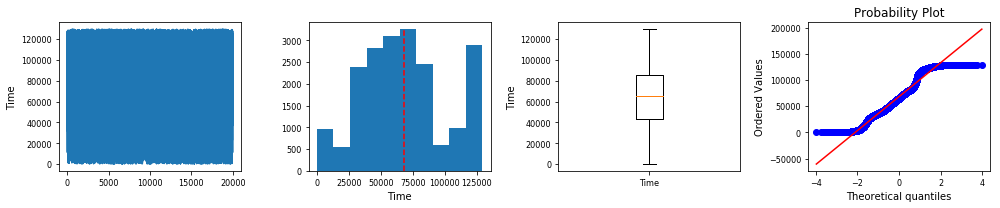

myplots Time


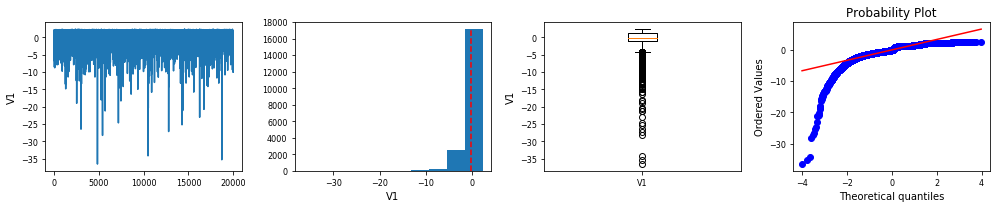

myplots V1


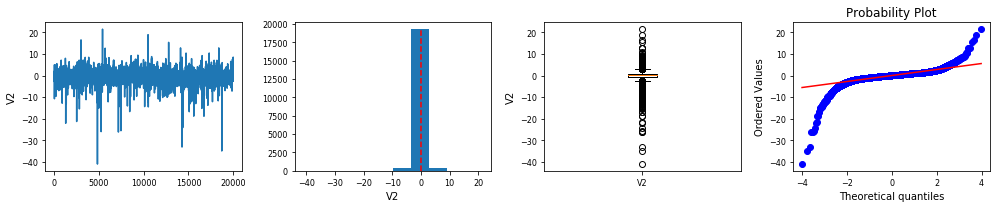

myplots V2


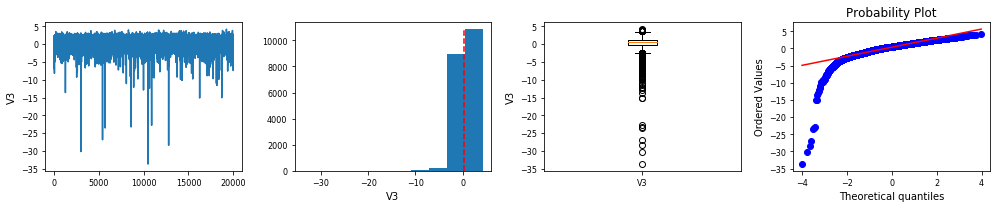

myplots V3


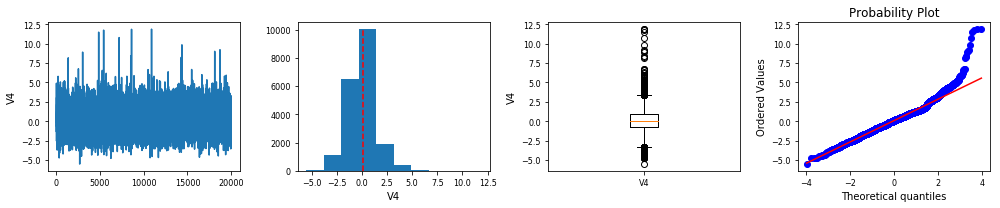

myplots V4


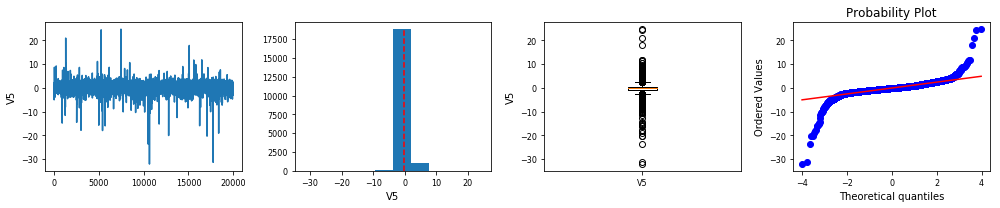

myplots V5


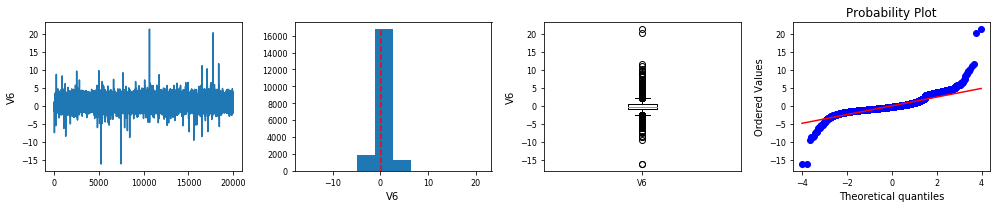

myplots V6


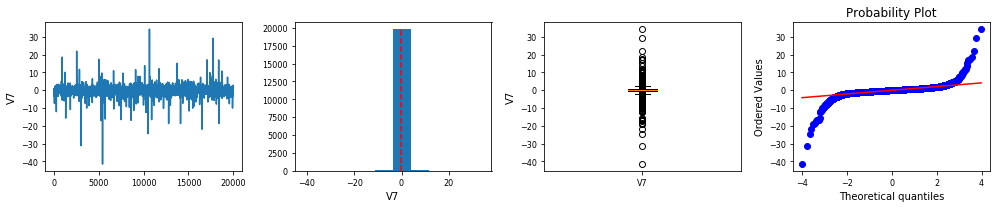

myplots V7


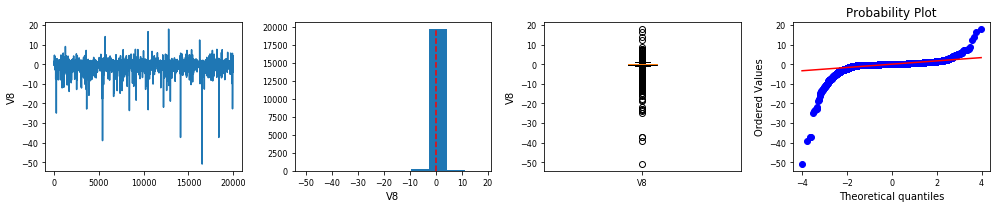

myplots V8


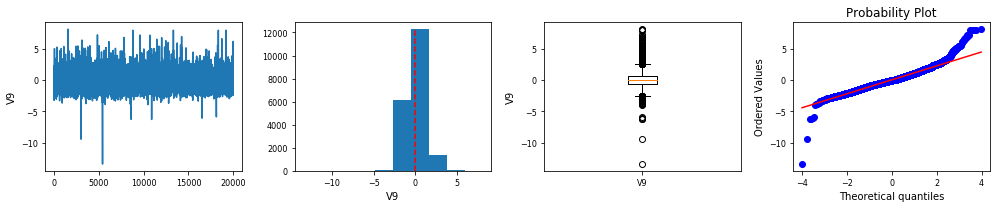

myplots V9


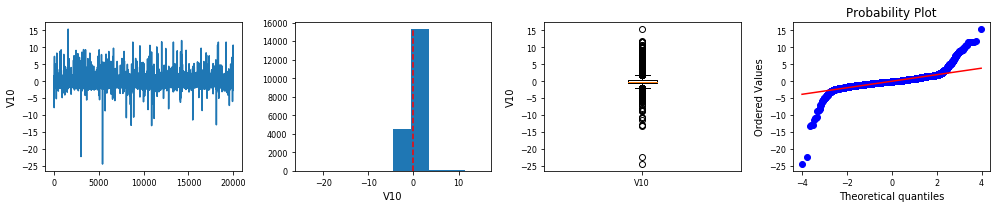

myplots V10


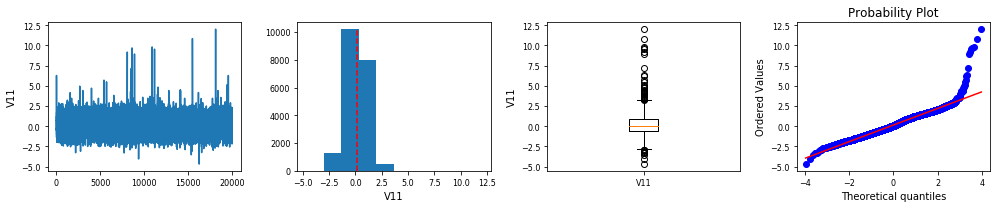

myplots V11


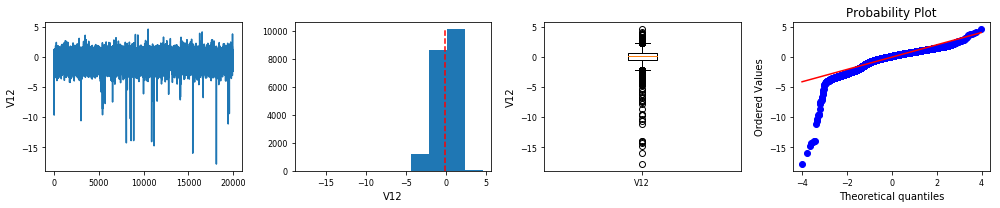

myplots V12


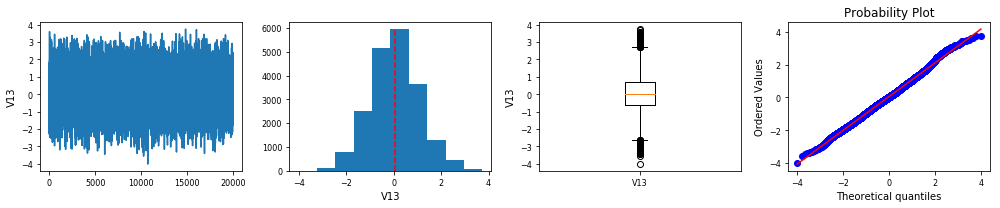

myplots V13


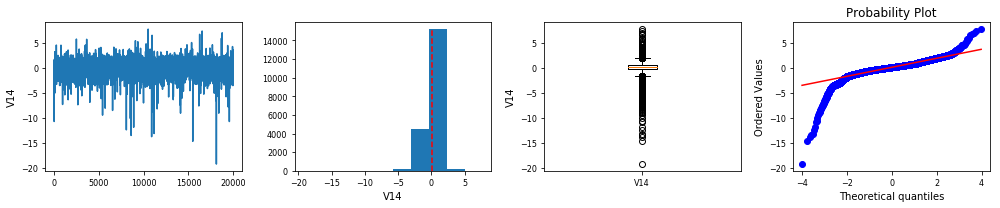

myplots V14


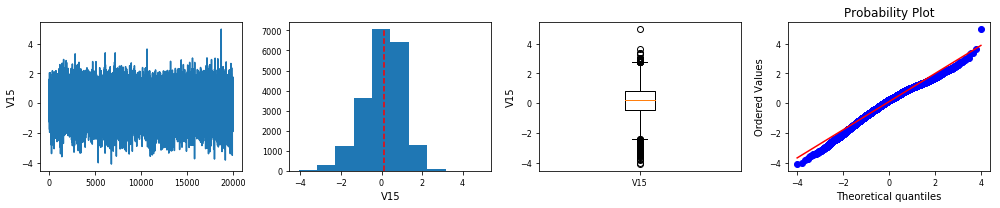

myplots V15


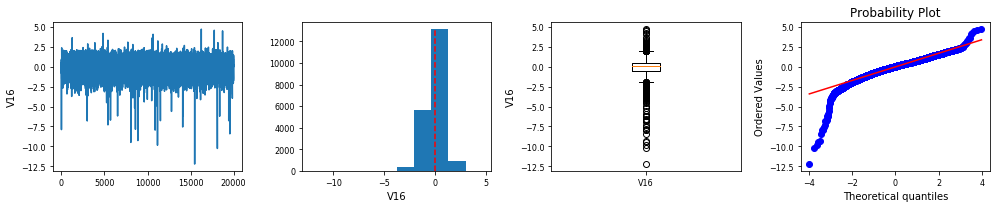

myplots V16


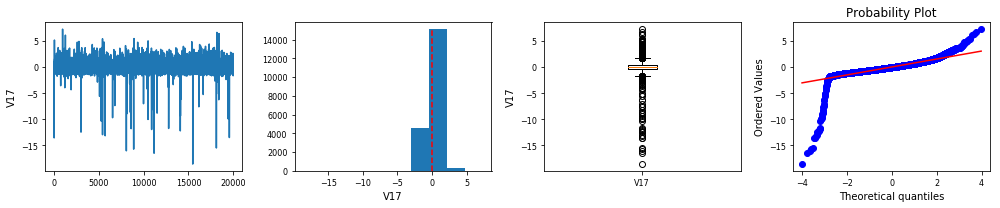

myplots V17


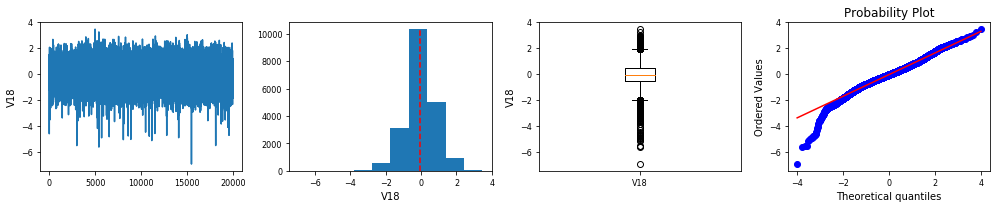

myplots V18


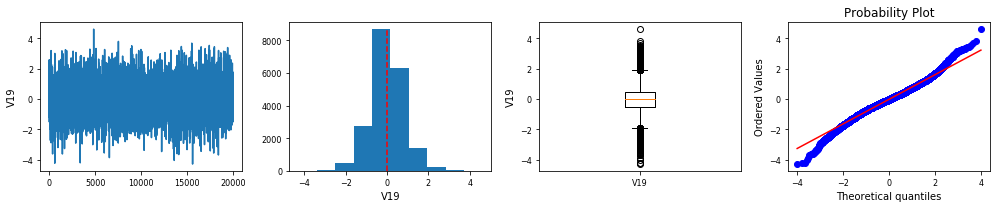

myplots V19


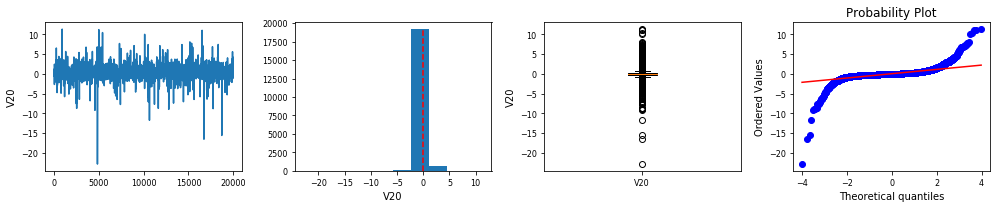

myplots V20


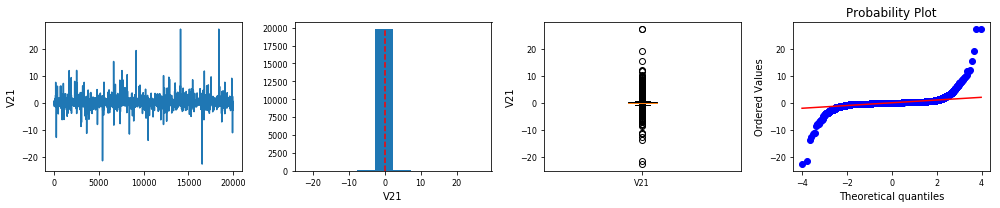

myplots V21


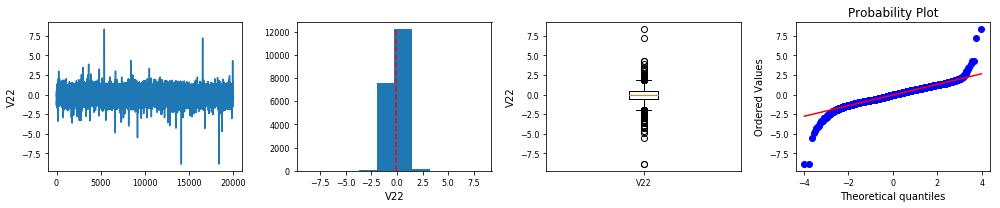

myplots V22


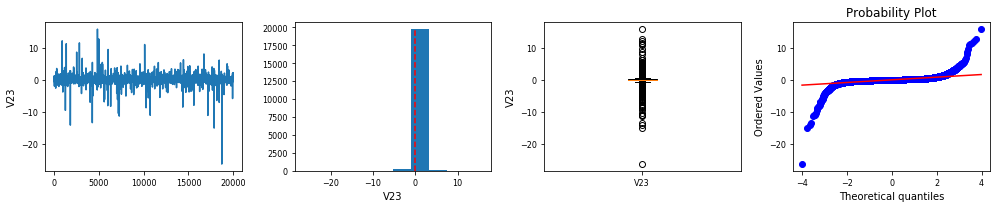

myplots V23


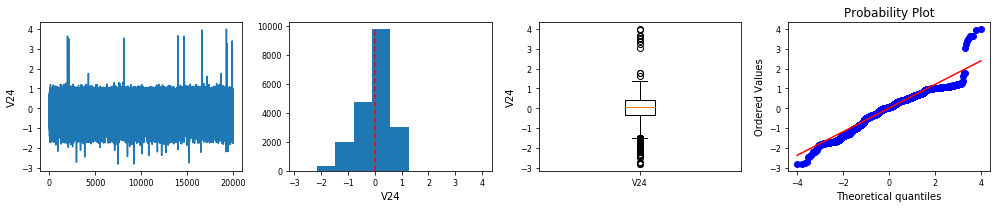

myplots V24


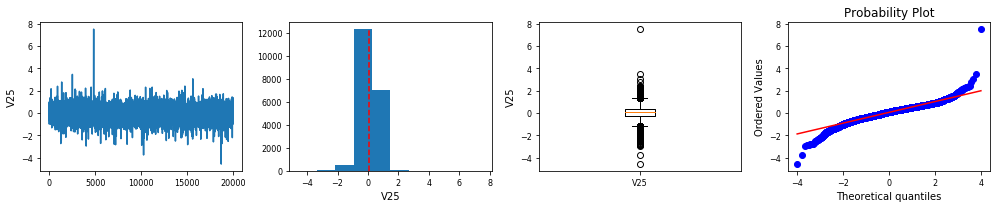

myplots V25


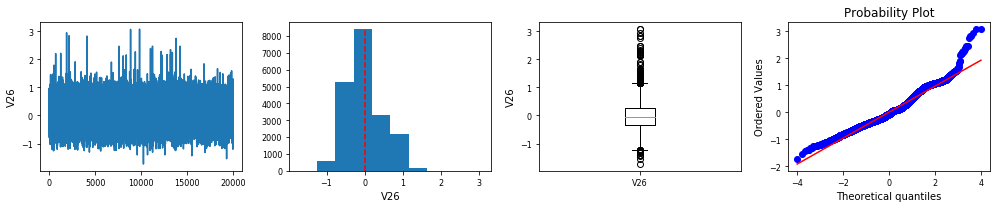

myplots V26


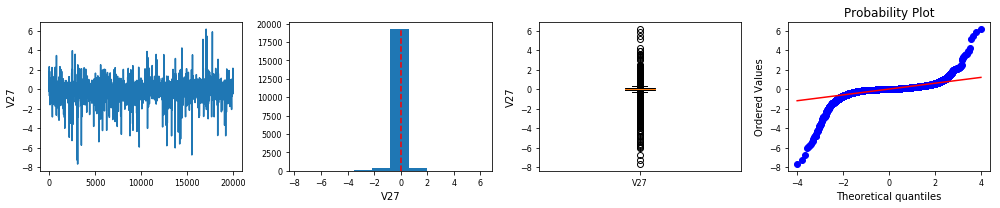

myplots V27


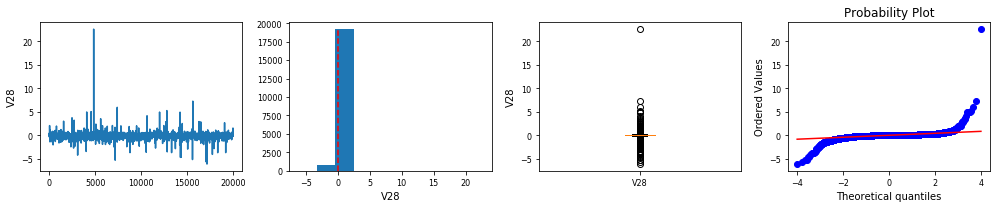

myplots V28


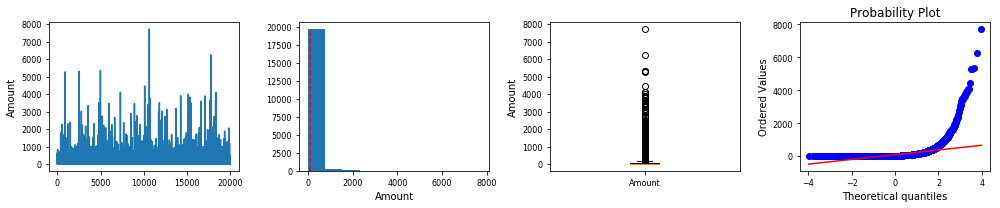

myplots Amount


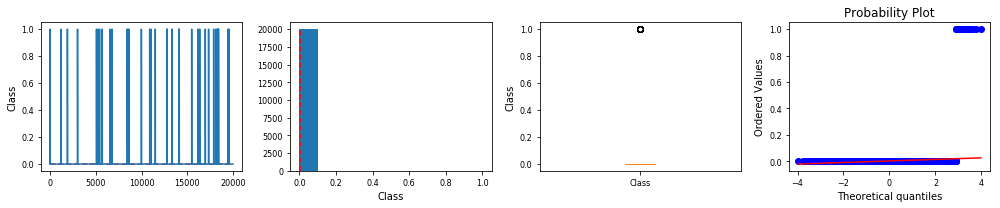

myplots Class


In [9]:
""" TODO
Display the distributions of the data
use visualize.featureplots(crime_stats_dropna.values, crime_stats.columns)
to generate trace plots, histograms, boxplots, and probability plots for
each feature.

A probability plot is utilized to evaulate the normality of a distribution.
The data are plot against a theoritical distribution, such that if the data 
are normal, they'll follow the diagonal line. See the reference above for 
more information.
"""
crime_stats_dropna = crime_stats.dropna()
# TODO: visualize the features
visualize.featureplots(crime_stats_dropna.values, crime_stats.columns)
# Right click to enable scrolling

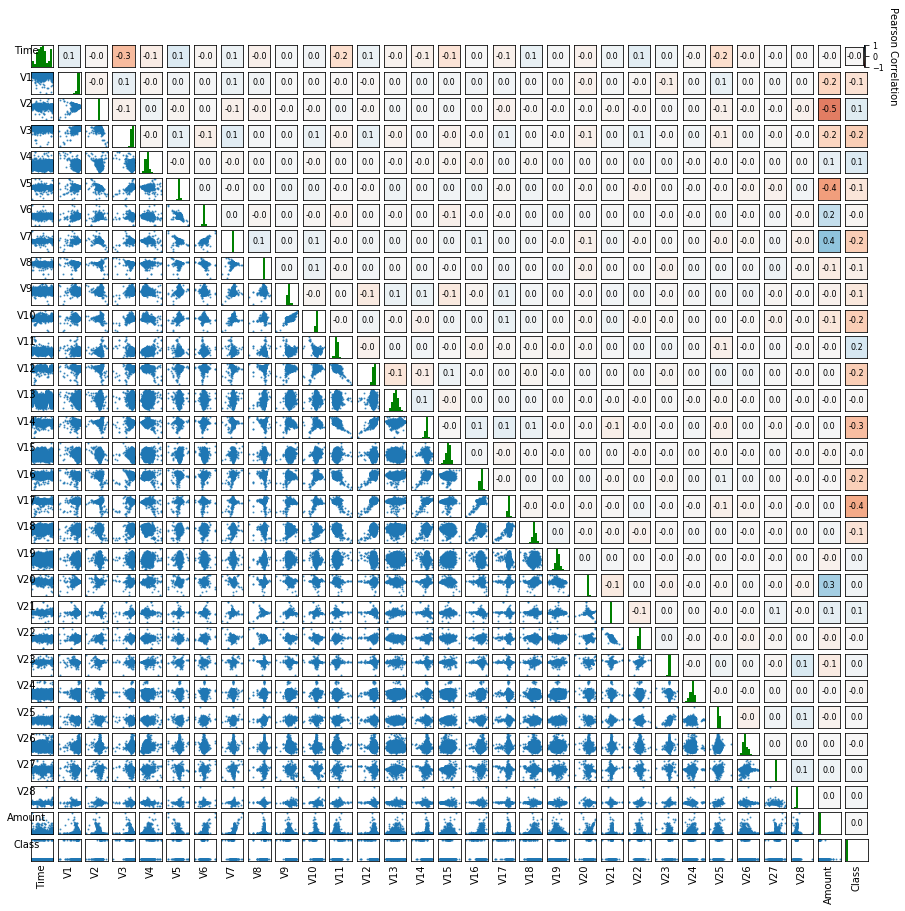

In [10]:
""" PROVIDED
Display the Pearson correlation between all pairs of the features
use visualize.scatter_corrplots(crime_stats_dropna.values, crime_stats.columns, corrfmt="%.1f", FIGW=15)
"""
visualize.scatter_corrplots(crime_stats_dropna.values, crime_stats.columns, corrfmt="%.1f", FIGW=15)

In [11]:
""" PROVIDED
Separate the postive and negative examples
"""
pos = crime_stats.loc[crime_stats['Class'] == 1] 
neg = crime_stats.loc[crime_stats['Class'] == 0] 

pos.shape, neg.shape

((37, 31), (19962, 31))

In [12]:
""" PROVIDED
Compute the postive fraction
"""
pos_fraction = pos.shape[0] / nRows
neg_fraction = 1 - pos_fraction

pos_fraction, neg_fraction

(0.00019288112267239402, 0.9998071188773276)

''

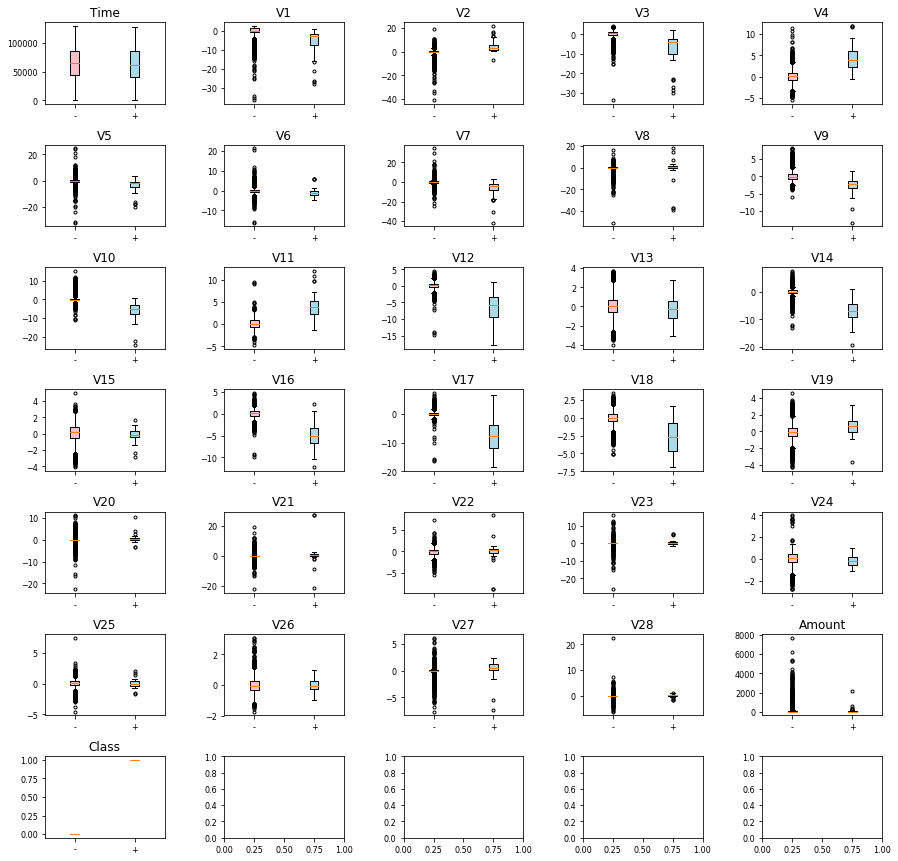

In [13]:
""" PROVIDED
Compare the features for the positive and negative examples
"""
features_displayed = pos.columns
ndisplayed = len(features_displayed)
ncols = 5
nrows = ceil(ndisplayed / ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 15))
fig.subplots_adjust(wspace=.5, hspace=.5)
axs = axs.ravel()
for ax, feat_name in zip(axs, features_displayed):
    boxplot = ax.boxplot([neg[feat_name], pos[feat_name]], patch_artist=True, sym='.')
                         #flierprops={markerfacecolor=['pink','lightblue'], marker='p'})
    boxplot['boxes'][0].set_facecolor('pink')
    boxplot['boxes'][1].set_facecolor('lightblue')
    ax.set_xticklabels(['-', '+'])
    ax.set(title=feat_name)
""""""

# PRE-PROCESS DATA

## Data Clean Up and Feature Selection

In [14]:
""" PROVIDED
Construct Pipeline to pre-process data
"""
feature_names = crime_stats.columns.drop(['Class'])
pipe_X = Pipeline([
    #("impute", SimpleImputer(strategy='median')),
    ("NaNrowDropper", DataSampleDropper()),
    ("selectAttribs", DataFrameSelector(feature_names)),
    ("scaler", RobustScaler())
])

pipe_y = Pipeline([
    ("NaNrowDropper", DataSampleDropper()),
    ("selectAttribs", DataFrameSelector(['Class']))
])

In [15]:
""" TODO
Pre-process the data using the pipeliine
"""
X = pipe_X.fit_transform(crime_stats)
y = pipe_y.fit_transform(crime_stats).values.ravel()
np.any(np.isnan(X))

False

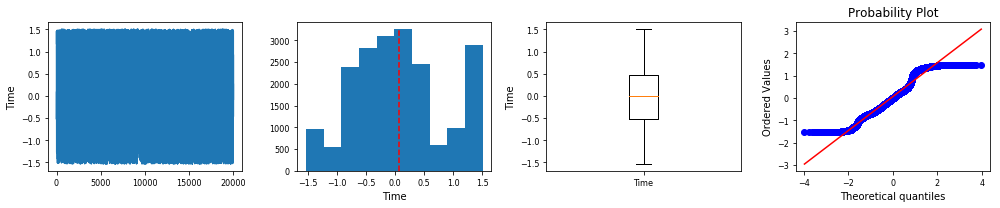

myplots Time


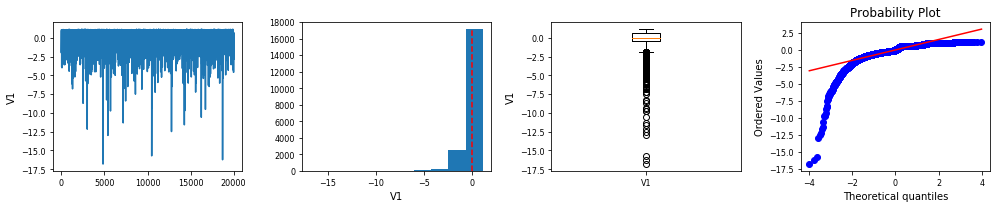

myplots V1


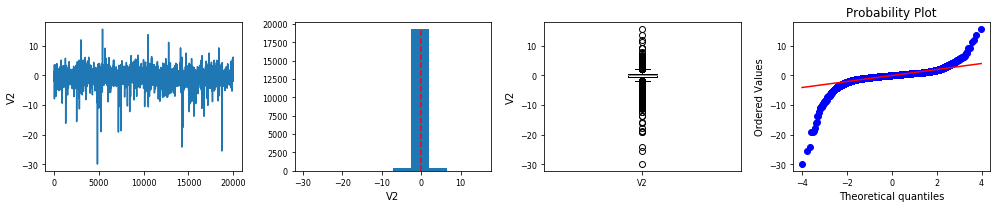

myplots V2


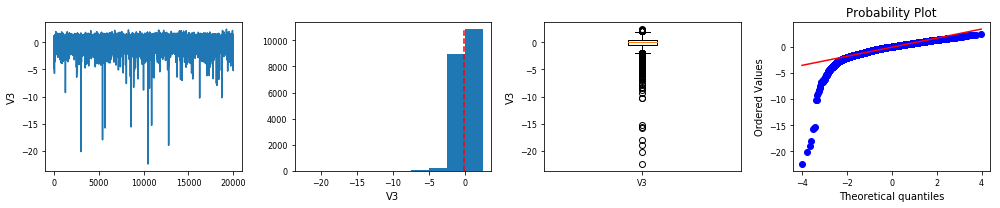

myplots V3


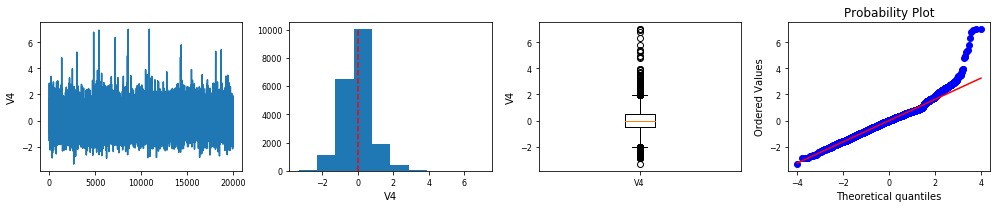

myplots V4


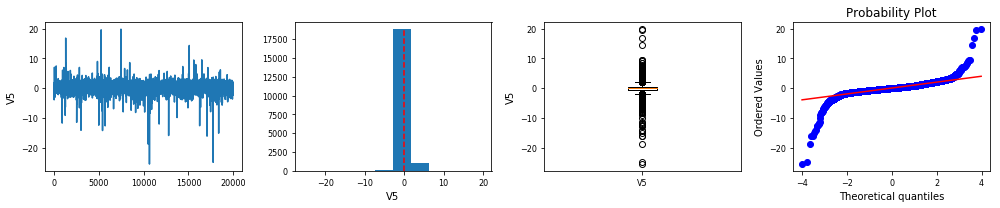

myplots V5


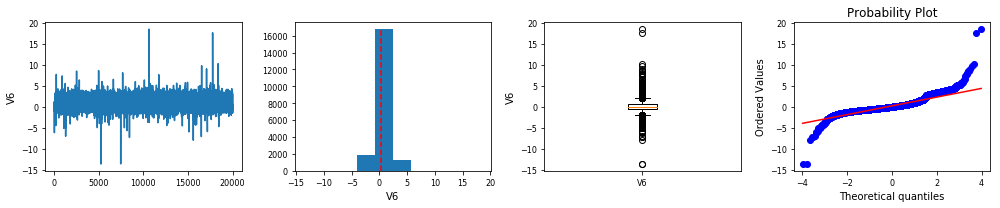

myplots V6


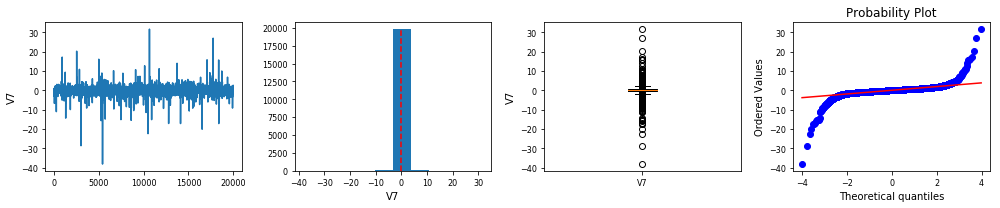

myplots V7


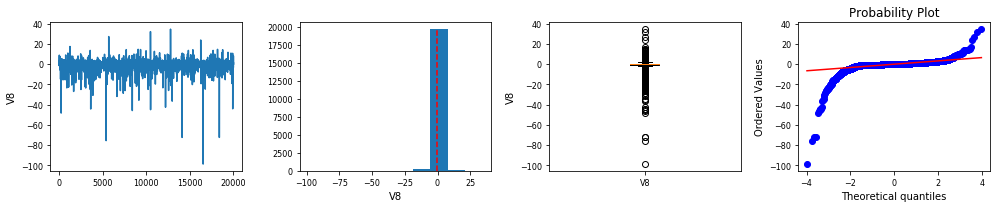

myplots V8


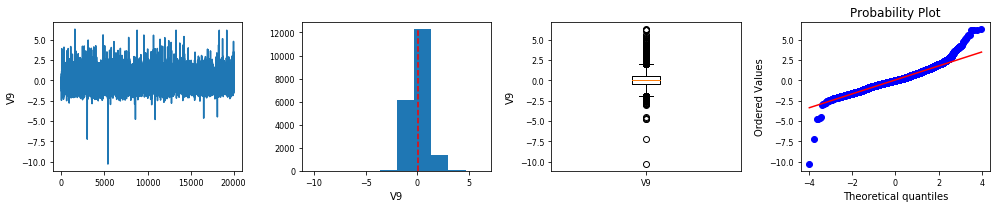

myplots V9


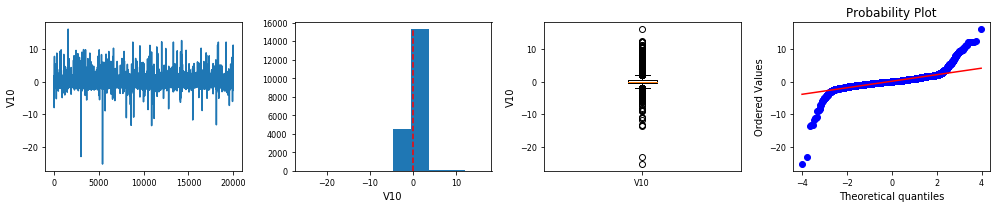

myplots V10


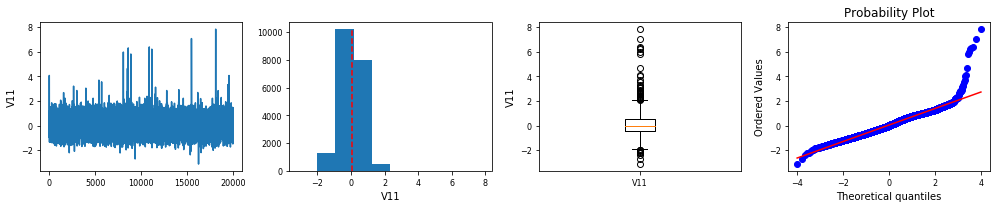

myplots V11


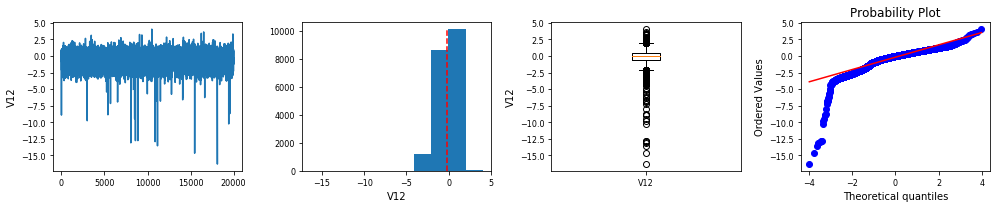

myplots V12


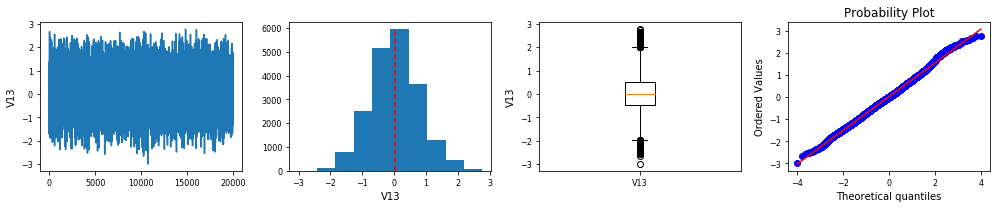

myplots V13


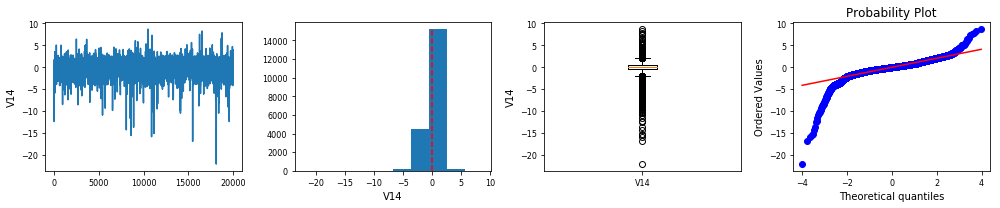

myplots V14


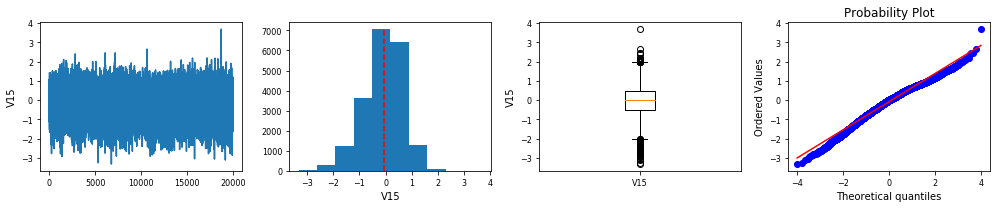

myplots V15


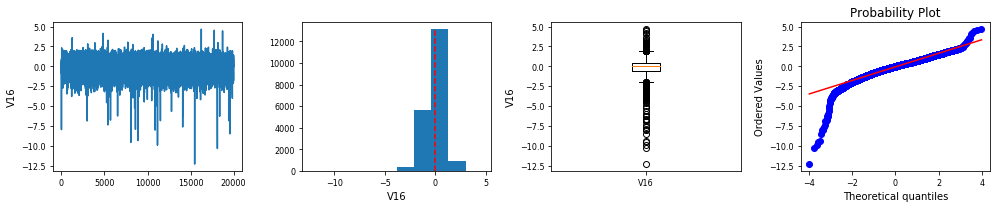

myplots V16


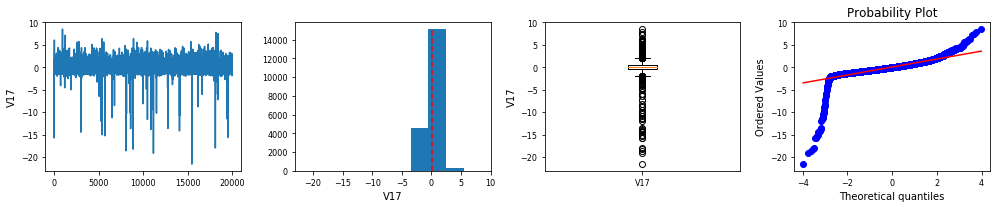

myplots V17


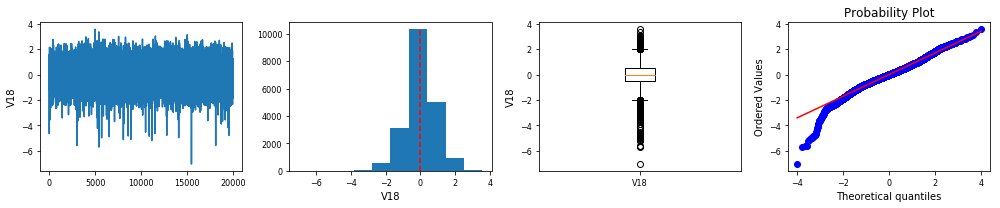

myplots V18


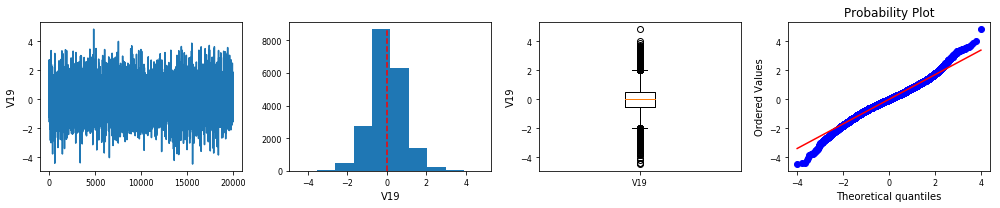

myplots V19


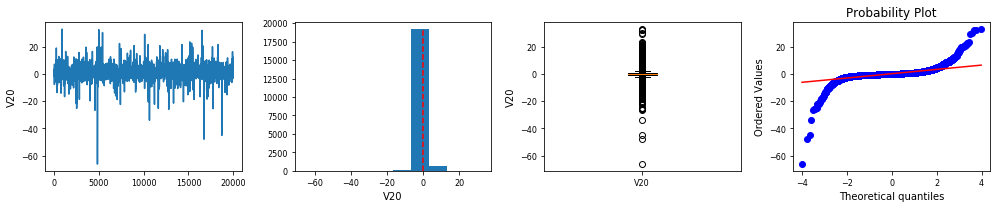

myplots V20


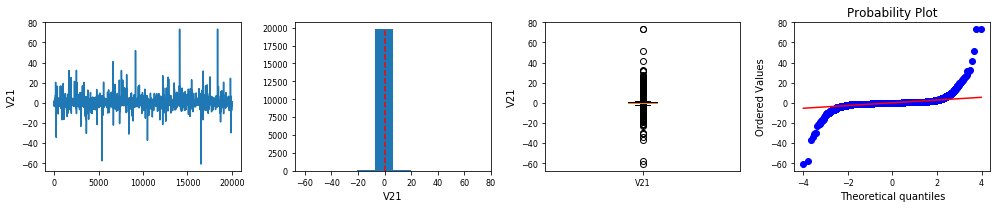

myplots V21


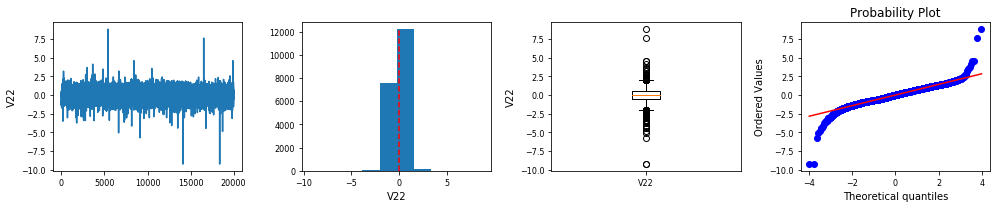

myplots V22


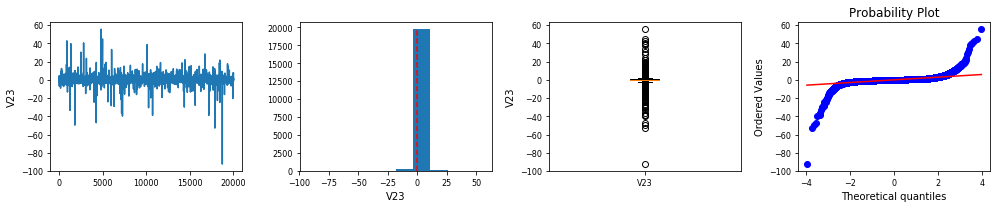

myplots V23


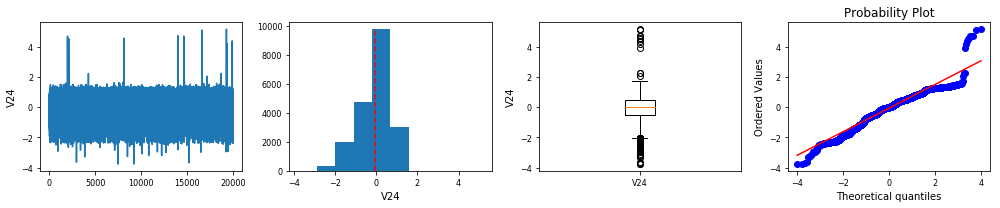

myplots V24


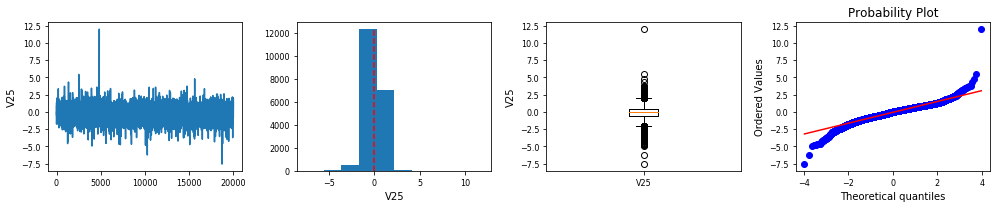

myplots V25


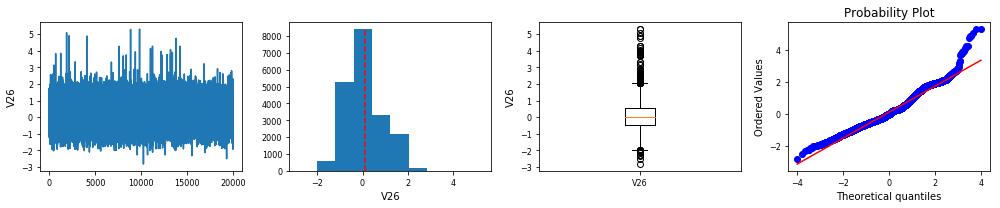

myplots V26


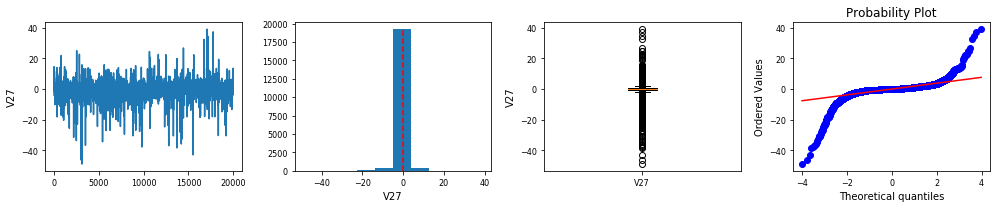

myplots V27


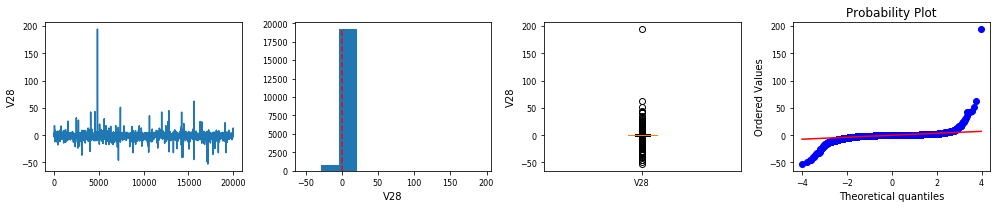

myplots V28


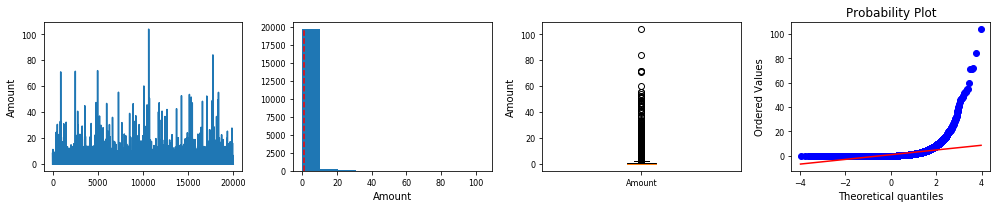

myplots Amount


In [16]:
""" TODO
Re-visualize the pre-processed data
use visualize.featureplots()
"""
visualize.featureplots(X, feature_names)

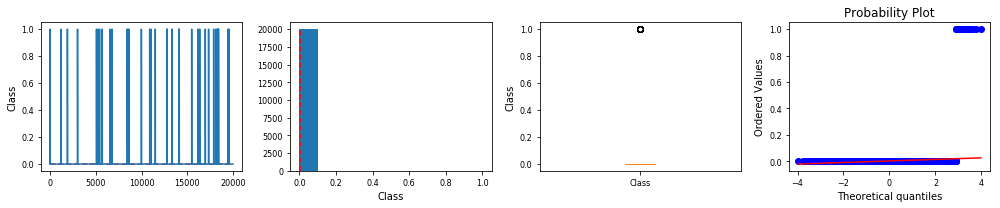

myplots Class


In [17]:
""" TODO
Re-visualize the pre-processed data
use visualize.featureplots()
"""
visualize.featureplots(y.reshape(-1,1), ['Class'])

# SVMs: EXPLORATION

In [18]:
""" TODO
Hold out a subset of the data, before training and cross validation
using train_test_split, with stratify NOT equal to None, and a test_size 
fraction of .2.

For this exploratory section, the held out set of data is a validation set.
For the GridSearch section, the held out set of data is a test set.
"""
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y, test_size=0.2)

In [19]:
""" TODO
Create and train SVC models. 
Explore various configurations of the hyper-parameters. 
Train the models on the training set and evaluate them for the training and
validation sets.

Play around with C, gamma, and class_weight. Feel free to play with other hyper-
parameters as well. See the API for more details.
C is a regularization parameter, gamma is the inverse of the radius of influence
of the support vectors (i.e. lower gamma means a higher radius of influence of the 
support vectors), and class weight determines whether to adjust the weights inversely
to the class fractions.
"""
model = SVC(C=5, gamma='scale', probability=True)
model.fit(Xtrain, ytrain)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Train Set Performance

ROC AUC: 1.0
PRC AUC: 0.9999999999999999
PSS: 0.9333
F1 Score 0.9655


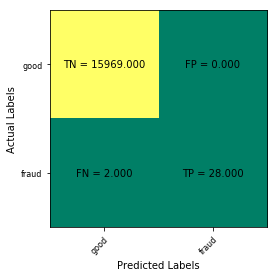

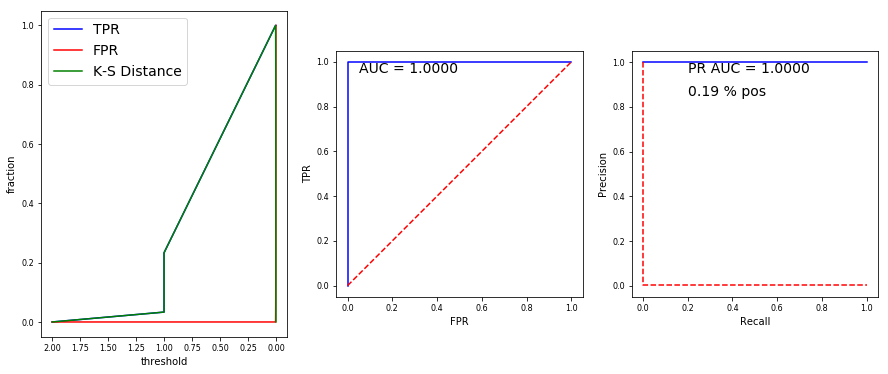

In [20]:
""" TODO
Evaluate training set performance. 
Display the confusion matrix, KS plot with
the cumulative distributions of the TPR and FPR, the ROC curve and the 
precision-recall curve (PRC). use metrics_plots.ks_roc_prc_plot(ytrue, scores)

The PRC, unlike the AUC, does not consider the true negative (i.e. TN) counts,
making the PRC more robust to unbalanced datasets.
"""
# TODO: Confusion matrix
# First, compute the predictions for the training set
# Second, use confusion_matrix
# Third, use metrics_plots.confusion_mtx_colormap() to display the matrix
preds = model.predict(Xtrain)
confusion_mtx = confusion_matrix(ytrain, preds)
metrics_plots.confusion_mtx_colormap(confusion_mtx, targetnames, targetnames)

# TODO: Curves
# First, use the model's decision function to compute the scores
# Second, use metrics_plots.ks_roc_prc_plot() to display the KS plot, ROC, and PRC
scores = model.decision_function(Xtrain)
#metrics_plots.ks_roc_prc_plot(ytrain, scores) # same as using proba

probas = model.predict_proba(Xtrain)
probas = probas[:,1]
roc_prc_results = metrics_plots.ks_roc_prc_plot(ytrain, probas)

pss_train = metrics_plots.skillScore(ytrain, preds)
f1_train = f1_score(ytrain.ravel(), preds)
print("PSS: %.4f" % pss_train[0])
print("F1 Score %.4f" % f1_train)

### Validation Set Performance

ROC AUC: 0.9860470108403993
PRC AUC: 0.6476550274921
PSS: 0.2857
F1 Score 0.4444


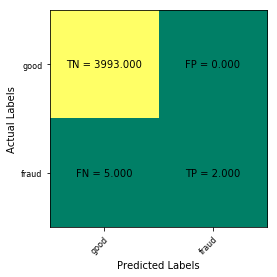

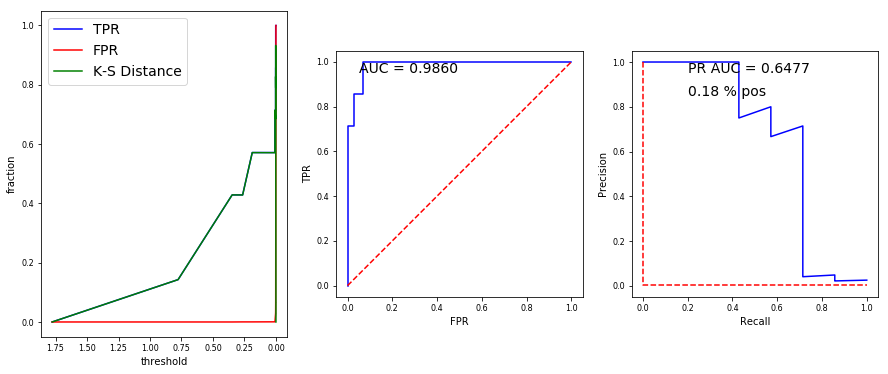

In [21]:
""" TODO
Evaluate validation performance. 
Display the confusion matrix, KS plot with the cumulative distributions of the TPR 
and FPR, the ROC curve and the precision-recall curve (PRC).
"""
# TODO: Confusion matrix
preds_val = model.predict(Xtest)
confusion_mtx_val = confusion_matrix(ytest, preds_val)
metrics_plots.confusion_mtx_colormap(confusion_mtx_val, targetnames, targetnames)

# TODO: Curves
scores_val = model.decision_function(Xtest)
#metrics_plots.ks_roc_prc_plot(ytest, scores_val)

probas_val = model.predict_proba(Xtest)
probas_val = probas_val[:,1]
roc_prc_res_val  = metrics_plots.ks_roc_prc_plot(ytest, probas_val)

pss_val = metrics_plots.skillScore(ytest, preds_val)
f1_val = f1_score(ytest, preds_val)
print("PSS: %.4f" % pss_val[0])
print("F1 Score %.4f" % f1_val)

# SVMs: STRATIFIED GRID SEARCH

## Scorers

In [22]:
""" PROVIDED
List of available scoring functions from the sklearn module
"""
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

## Execute Grid Search

In [23]:
""" TODO
Estimated time: <30 min on mlserver
Set up and run the grid search using GridSearchCV and the following 
settings:
* SVC for the model,
* The above scoring dictionary for scoring,
* refit set to 'f1' as the optimized metric
* Five for the number of cv folds, 
* n_jobs=3, 
* verbose=2, 
* return_train_score=True
"""
# Optimized metric
opt_metric = 'f1'
scoring = {opt_metric:opt_metric}

# Flag to re-load previous run
force = False
# File previous run is saved to
srchfname = "hw8_search_sol_" + opt_metric + ".pkl"

# SETUP EXPERIMENT HYPERPARAMETERS
Cs = [.5, 1, 10, 100, 200]
gammas = np.logspace(-4, 0, num=5, endpoint=True, base=5)

nCs = len(Cs)
ngammas = len(gammas)

hyperparams = {'C':Cs, 'gamma':gammas, 'tol':[1e-4],
               'class_weight':[None, 'balanced'], 
               'probability':[True]}

# RUN EXPERIMENT
time0 = timelib.time()
search = None
if force or (not os.path.exists(srchfname)):
    # TODO: Create the GridSearchCV object
    search = GridSearchCV(model, hyperparams, scoring=scoring, refit=opt_metric,
                          cv=5, n_jobs=3, verbose=2, return_train_score=True)
    # TODO: Execute the grid search by calling fit using the training data
    search.fit(Xtrain, ytrain)
    # TODO: Save the grid search object
    #joblib.dump(search, srchfname)
    print("Saved %s" % srchfname)
else:
    search = joblib.load(srchfname)
    print("Loaded %s" % srchfname)

time1 = timelib.time()
duration = time1 - time0
print("Elapsed Time: %.2f min" % (duration / 60))

search

Loaded hw8_search_sol_f1.pkl
Elapsed Time: 0.00 min


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'C': [0.5, 1, 10, 100, 200], 'gamma': array([0.0016, 0.008 , 0.04  , 0.2   , 1.    ]), 'tol': [0.0001], 'class_weight': [None, 'balanced'], 'probability': [True]},
       pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
       scoring={'f1': 'f1'}, verbose=2)

# RESULTS

In [24]:
""" PROVIDED
Display the head of the results for the grid search
See the cv_results_ attribute
"""
all_results = search.cv_results_
df_res = pd.DataFrame(all_results)
df_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_gamma,param_probability,param_tol,params,...,mean_test_f1,std_test_f1,rank_test_f1,split0_train_f1,split1_train_f1,split2_train_f1,split3_train_f1,split4_train_f1,mean_train_f1,std_train_f1
0,1.040989,0.131170,0.030669,0.003418,0.5,None,0.0016,True,0.0001,"{'C': 0.5, 'class_weight': None, 'gamma': 0.00...",...,0.688869,0.189760,5,0.755556,0.826087,0.782609,0.782609,0.711111,0.771594,0.037756
1,1.905955,0.158398,0.058488,0.009544,0.5,None,0.008,True,0.0001,"{'C': 0.5, 'class_weight': None, 'gamma': 0.00...",...,0.423794,0.158055,17,0.611111,0.761905,0.611111,0.731707,0.529412,0.649049,0.085744
2,5.988848,0.418537,0.161187,0.033308,0.5,None,0.04,True,0.0001,"{'C': 0.5, 'class_weight': None, 'gamma': 0.04...",...,0.000000,0.000000,48,0.000000,0.285714,0.000000,0.222222,0.153846,0.132357,0.115838
3,39.459619,3.636114,0.879432,0.097664,0.5,None,0.2,True,0.0001,"{'C': 0.5, 'class_weight': None, 'gamma': 0.2,...",...,0.000000,0.000000,48,0.000000,0.153846,0.000000,0.153846,0.153846,0.092308,0.075369
4,126.873487,2.801351,2.280220,0.187062,0.5,None,1,True,0.0001,"{'C': 0.5, 'class_weight': None, 'gamma': 1.0,...",...,0.000000,0.000000,48,0.000000,0.153846,0.000000,0.153846,0.153846,0.092308,0.075369


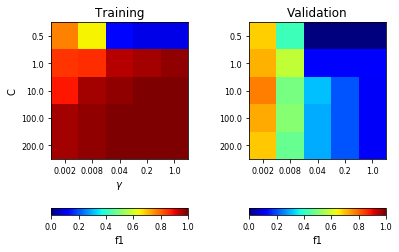

In [25]:
""" PROVIDED
Plot the mean training and validation results from the grid search as a
colormap, for C (y-axis) vs the gamma (x-axis), for class_weight=None
"""
results_grid_train = df_res['mean_train_'+opt_metric].values.reshape(nCs, 2, ngammas)
results_grid_val = df_res['mean_test_'+opt_metric].values.reshape(nCs, 2, ngammas)

fig, axs = plt.subplots(1, 2, figsize=(6,6))
fig.subplots_adjust(wspace=.45)
axs = axs.ravel()
means = [("Training", results_grid_train),
         ("Validation", results_grid_val)]
for i, (name, result) in enumerate(means):
    img = axs[i].imshow(result[:,0,:], cmap="jet", vmin=0, vmax=1)
    axs[i].set_title(name)
    axs[i].set_xticks(range(ngammas))
    axs[i].set_yticks(range(nCs))
    axs[i].set_xticklabels(np.around(gammas, 3))
    axs[i].set_yticklabels(np.around(Cs, 3))
    axs[i].figure.colorbar(img, ax=axs[i], label=opt_metric, 
                           orientation='horizontal')
    if i == 0:
        axs[i].set_xlabel(r"$\gamma$")
        axs[i].set_ylabel("C")
#fig.suptitle('class_weight=None')

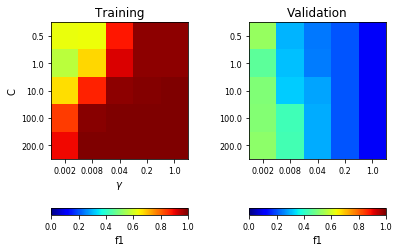

In [26]:
""" 
Plot the mean training and validation results from the grid search as a
colormap, for C (y-axis) vs the gamma (x-axis), for class_weight='balanced'
"""
fig, axs = plt.subplots(1, 2, figsize=(6,6))
fig.subplots_adjust(wspace=.45)
axs = axs.ravel()
means = [("Training", results_grid_train),
         ("Validation", results_grid_val)]
for i, (name, result) in enumerate(means):
    img = axs[i].imshow(result[:,1,:], cmap="jet", vmin=0, vmax=1)
    axs[i].set_title(name)
    axs[i].set_xticks(range(ngammas))
    axs[i].set_yticks(range(nCs))
    axs[i].set_xticklabels(np.around(gammas, 3))
    axs[i].set_yticklabels(np.around(Cs, 3))
    axs[i].figure.colorbar(img, ax=axs[i], label=opt_metric, 
                           orientation='horizontal')
    if i == 0:
        axs[i].set_xlabel(r"$\gamma$")
        axs[i].set_ylabel("C")
#fig.suptitle('class_weight=None')

In [27]:
""" TODO
Obtain the best model from the grid search and 
fit it to the full training data
"""
best_model = search.best_estimator_
best_model.fit(Xtrain, ytrain)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0016, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.0001, verbose=False)

### Train Set Performance

ROC AUC: 0.999000146116434
PRC AUC: 0.9545454749276676
PSS: 0.8997
F1 Score 0.8852


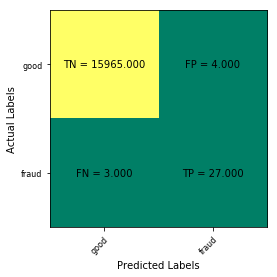

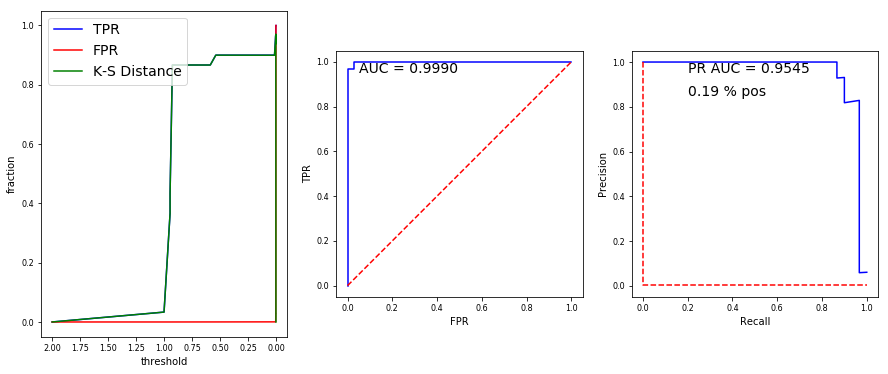

In [28]:
""" TODO
For the best model, display the confusion matrix, KS plot, ROC curve, 
and PR curve for the training set
"""
# TODO: Confusion Matrix
preds = best_model.predict(Xtrain)
confusion_mtx = confusion_matrix(ytrain, preds)
metrics_plots.confusion_mtx_colormap(confusion_mtx, targetnames, targetnames)

# TODO: Curves
scores = best_model.decision_function(Xtrain)
#metrics_plots.ks_roc_prc_plot(ytrain, scores)

probas = best_model.predict_proba(Xtrain)
probas = probas[:,1]
roc_prc_results = metrics_plots.ks_roc_prc_plot(ytrain, probas)

pss_res = metrics_plots.skillScore(ytrain, preds)
f1_res = f1_score(ytrain, preds)
print("PSS: %.4f" % pss_res[0])
print("F1 Score %.4f" % f1_res)

### Test Set Performance

ROC AUC: 0.9953847805087473
PRC AUC: 0.7394221938327792
PSS: 0.5714
F1 Score 0.7273


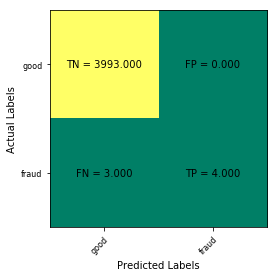

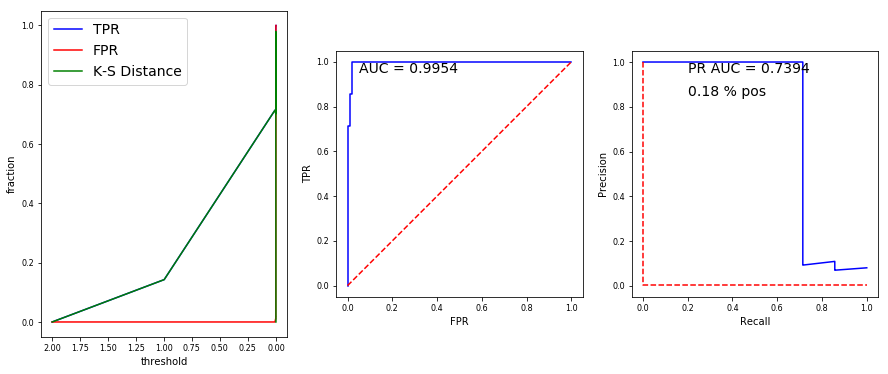

In [29]:
""" TODO
For the best model, display the confusion matrix, KS plot, ROC curve, 
and PR curve for the test set
"""
# TODO: Confustion Matrix
preds_test = best_model.predict(Xtest)
confusion_mtx_test = confusion_matrix(ytest, preds_test)
metrics_plots.confusion_mtx_colormap(confusion_mtx_test, targetnames, targetnames)

# TODO: Curves
scores_test = best_model.decision_function(Xtest)
#metrics_plots.ks_roc_prc_plot(ytest, scores_test)

proba_test =  best_model.predict_proba(Xtest)
proba_test = proba_test[:,1]
roc_prc_res_test = metrics_plots.ks_roc_prc_plot(ytest, proba_test)

pss_res_test = metrics_plots.skillScore(ytest, preds_test)
f1_res_test = f1_score(ytest, preds_test)
print("PSS: %.4f" % pss_res_test[0])
print("F1 Score %.4f" % f1_res_test)

Text(0.5, 1.0, 'Scores for negative and positve examples')

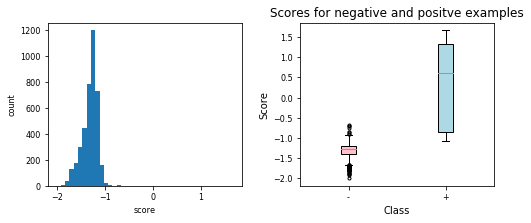

In [30]:
""" TODO
Plot a histogram of the test scores from the best model.
Compare the distribution of scores for positive and negative examples
using boxplots.

Create one subplot of the distribution of all the scores, with a histogram. 
Create a second subplot comparing the distribution of the scores of the 
positive examples with the distribution of the negative examples, with boxplots.
"""
# TODO: Obtain the indices of the pos and neg examples
pos_mask = ytest == 1
neg_mask = ytest == 0

# TODO: Separate the scores for the pos and neg examples
scores_pos = scores_test[pos_mask]
scores_neg = scores_test[neg_mask]

# TODO: Plot the distribution of all scores
nbins = 41
plt.figure(figsize=(8,3))
plt.subplots_adjust(wspace=.3)
plt.subplot(1,2,1)
plt.hist(scores_test, bins=nbins)
plt.xlabel('score', fontsize=FONTSIZE)
plt.ylabel('count', fontsize=FONTSIZE)
plt.title("Distribution of Scores")

# TODO: Plot the boxplots of the pos and neg examples' scores
plt.subplot(1,2,2)
boxplot = plt.boxplot([scores_neg, scores_pos], patch_artist=True, sym='.')
boxplot['boxes'][0].set_facecolor('pink')
boxplot['boxes'][1].set_facecolor('lightblue')
plt.xticks(ticks=[1, 2], labels=['-', '+'])
plt.xlabel("Class")
plt.ylabel("Score")
plt.title("Scores for negative and positve examples")

Text(0.5, 1.0, 'Probabilities for negative and positve examples')

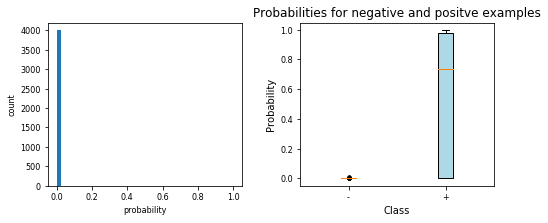

In [31]:
""" TODO
Plot a histogram of the test probabilities from the best model.
Compare the distribution of probabilities for positive and negative examples
using boxplots.
"""
# Separate the probabilities for the pos and neg examples
probas_pos = proba_test[pos_mask]
probas_neg = proba_test[neg_mask]

# Plot the distribution of all probabilities
nbins = 41
plt.figure(figsize=(8,3))
plt.subplots_adjust(wspace=.3)
plt.subplot(1,2,1)
plt.hist(proba_test, bins=nbins)
plt.xlabel('probability', fontsize=FONTSIZE)
plt.ylabel('count', fontsize=FONTSIZE)

# Plot the boxplots of the pos and neg examples' probabilities
plt.subplot(1,2,2)
boxplot = plt.boxplot([probas_neg, probas_pos], patch_artist=True, sym='.')
boxplot['boxes'][0].set_facecolor('pink')
boxplot['boxes'][1].set_facecolor('lightblue')
plt.xticks(ticks=[1, 2], labels=['-', '+'])
plt.xlabel("Class")
plt.ylabel("Probability")
plt.title("Probabilities for negative and positve examples")

# Discussion
In 3 to 4 paragraphs, discuss and interpret the test results for the best model. Include a brief discussion of the difference in the meaning of the AUC for the ROC vs the AUC for the PRC. Also, discuss the histogram and boxplots of the scores.

__GeneralAnswer__:  
Test Results:   
ROC AUC: 0.9954  
PRC AUC: 0.7394  
PSS: 0.5714  
F1 Score 0.7273  

The best model from the grid search is able to correctly identify all 3993 of the nonfraudulent transactions correctly, and incorrectly classifies 3 of the fraud transactions as not fraud. This results in FPR = 0 and more than half of the fraud cases are correctly identified (i.e. $TPR = \frac{4}{7} = .5714 \approx PSS$). Which is better than a random classifier which would detect the frauds at the rate of their appearance in the original dataset which is about .0018. The ROC and PRC AUC, PSS, and F1 Scores are better than that of a random classifier. Therfore, the model appears to generalize relatively well, indicating a descent skill level of the model to predict fraudulent transactions.


TPR = $\frac{TP}{TP + FN}$  
FPR = $\frac{FP}{FP + TN}$  

Recall = TPR = $\frac{TP}{TP + FN}$  
Precision = $\frac{TP}{TP + FP}$  
F1 Score = 2 * $\frac{precision * recall}{precision + recall}$  

The AUC from the ROC curve is high when the TPRs are high relative to the FPRs for all choices of thresholds within the ROC plot.
The AUC from the PR curve is high when the recall (i.e. the TPR) and the precision are both high for all choices of thresholds within the ROC plot. 
The key difference in the ROC AUC and the PR AUC is the utilization of the FPR in the ROC curve and the utilization of the precision in the PR curve; both utlize the TPR. $FPR = \frac{FP}{FP + TN}$, takes into consideration the TN. For highly imbalanced data where the number of negative cases makes up more than 90% of the data set, the FPR can be very low (which is good), whilst incorrectly classifying a majority or all of the positive cases, resulting in a high ROC AUC. If we are more interested in ensuring the positive cases are predominatly well identified, then the ROC AUC is not a good metric to verify this. For ROC curves, they should be mostly on the far left of the plot, which is when the FPR is low for most of the thresholds, which is easier for highly imbalanced data.
$Precision = \frac{TP}{TP + FP}$, which disregards the TN and evalutes the accuracy of the model's positive predictions. Regardless of whether the data set is imbalanced or not, if too many of the model's predicted positive classifications are incorrect, it is penalized with a lower precision. For a random classifier, precision is equal to the fraction of positive examples within the data set, for all thresholds in the PRC plot. Thus, as it pertains to the AUC of the PR curve, when the TPR is high and the model's FP count is low, yielding a high precision and high PRC AUC.

The scores returned by the decision function are proportional to the corresponding example's position and distance from the decision boundary. If the classifier has found a good decision boundary, we would expect the positions and thus the distribution of scores between positive and negative examples to be as far apart as possible. Since a vast majority of the examples are negative, we can see in the histogram of all the scores, that the vast majority of scores are negative. Due to the small number of fraud examples relative to the number of non-fraud examples, it is difficult to compare the histograms of the two classes. We can better compare the distributions with the boxplots. For the boxplots, we see a decent separation in the distribution of scores between the fraud and non-fraud examples, with some overlap past the 75th percentiles. The bulk of the density of the scores for the non-fraud examples is within a small range, and all have negative scores. The distribution of the scores for the fraud examples has a broad range. Some of the fraud examples' scores are negative, hence the misclassified fraud examples seen in the confusion matrix. However, the median score for the fraud examples is positive, hence the majority of positve examples correctly being classified.

For the distribution of probabilities, we see that the classifier determines that all the non-fraud examples have little to no probability of being fraud. However, we see more variation in the model's certainty about the fraud examples, as their probabilities range from near zero up to 1. These observations are consistent with the confusion matrix, where all non-fraud examples are correctly identified, and most, but not all, of the fraud examples are correctly identified. The model's uncertainity about some of the positive examples results in a few misclassifications. 

This uncertainty in some classifications, suggests the difficulty of the model to determine a perfect decision boundary within the feature space, that isolates all fraud examples on one side and the non-fraud on the other side.
